In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries are installed successfully!")


Libraries are installed successfully!


In [30]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For beautiful statistical plots

# Load dataset
data = pd.read_csv(r'C:\Users\Anastasiia\Documents\GitHub\churn_prediction\data\BankChurners.csv')

# Drop CLIENTNUM and Naive Bayes classifier columns
data.drop(columns=['CLIENTNUM', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
          inplace=True)

# Overview
print("Data Overview:")
display(data.head())
print("Shape of data:", data.shape)
print("Null Values:")
print(data.isnull().sum())


Data Overview:


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Shape of data: (10127, 20)
Null Values:
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


General information about the data

In [32]:
# Check the shape of the dataset (number of rows and columns)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# General information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Summary statistics for numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())



The dataset has 10127 rows and 19 columns.

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  object  
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  object  
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  object  
 5   Marital_Status            10127 non-null  object  
 6   Income_Category           10127 non-null  object  
 7   Card_Category             10127 non-null  object  
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              

Deleting of unnecessary columns

In [35]:
# Dropping two unnecessary columns
columns_to_drop = [
    'CLIENTNUM',
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]

# Check if columns exist in the dataset before dropping
for col in columns_to_drop:
    if col in df.columns:
        print(f"Dropping column: {col}")
    else:
        print(f"Column {col} not found in the dataset.")

# Drop the columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Confirm columns are removed
print("\nRemaining columns after dropping:")
print(df.columns)



Column CLIENTNUM not found in the dataset.
Column Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 not found in the dataset.
Column Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 not found in the dataset.

Remaining columns after dropping:
Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_Segment', 'Utilization_Segment'],
      dtype='object')


Checking for missing values


Missing values in each column:
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Credit_Limit_Segment        0
Utilization_Segment         0
dtype: int64


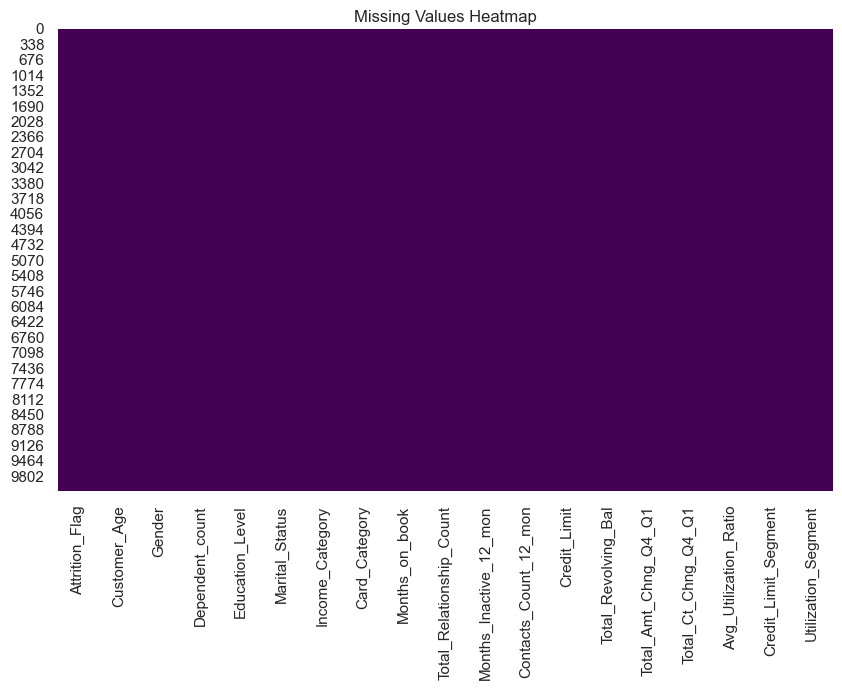

In [36]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


 **Encode Categorical Columns and Clean Data**

In [37]:
# Encode target variable and binary features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode categorical features
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    if 'Unknown' in data[col].unique():
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col).drop(columns='{}_Unknown'.format(col))], axis=1)
    else:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)

# Drop original categorical columns
data.drop(columns=categorical_cols, inplace=True)

print("Cleaned Data:")
display(data.head())
print("Updated Shape:", data.shape)

Cleaned Data:


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_8548\4186793203.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_8548\4186793203.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,True,False,False,False,True,False,True,False,False,False
1,0,49,1,5,44,6,1,2,8256.0,864,...,False,False,True,False,False,True,True,False,False,False
2,0,51,0,3,36,4,1,0,3418.0,0,...,False,True,False,False,True,False,True,False,False,False
3,0,40,1,4,34,3,4,1,3313.0,2517,...,False,False,True,False,False,False,True,False,False,False
4,0,40,0,3,21,5,1,0,4716.0,0,...,True,False,False,False,True,False,True,False,False,False


Updated Shape: (10127, 34)


Find anomalies (outliers)

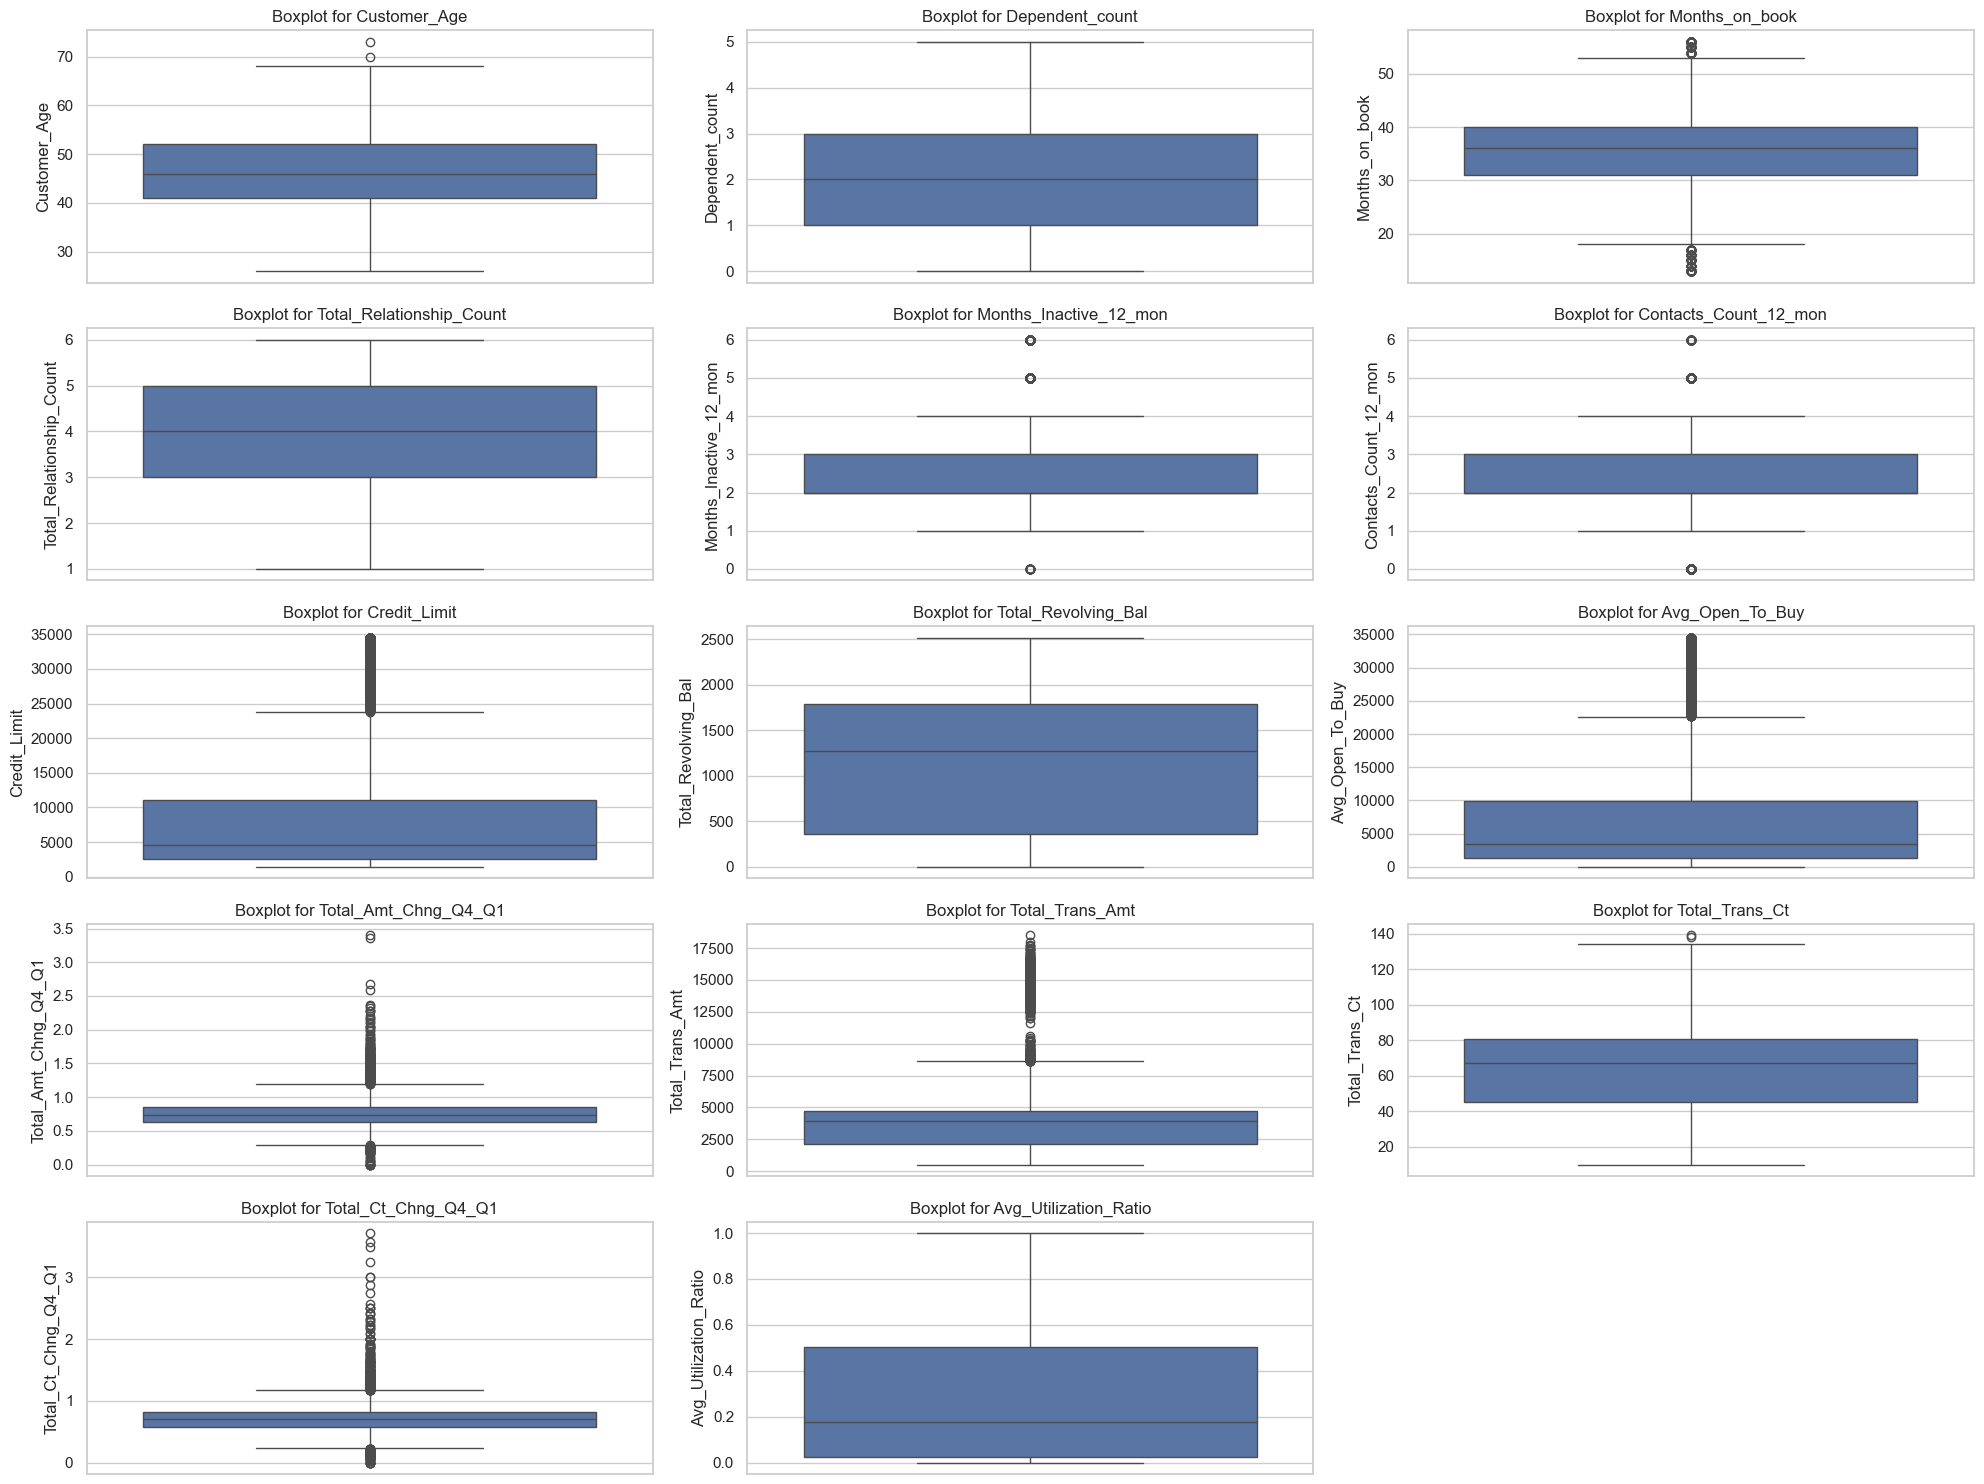

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visualization
sns.set(style="whitegrid")

# Select numerical columns from the dataframe
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Set the figure size for all boxplots
plt.figure(figsize=(20, 15))

# Loop through all numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i + 1)  # Create a grid with 3 plots per row
    sns.boxplot(y=df[col])  # Create a boxplot for the column
    plt.title(f"Boxplot for {col}")  # Add a title for each boxplot
    plt.xlabel('')  # Remove x-axis labels for cleaner visuals

# Automatically adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


Processing Anomalies

Anomalies are defined as values that fall outside 1.5 * IQR (Interquartile Range).



In [8]:
# Function to detect and display outliers using IQR method
def detect_outliers_iqr(dataframe, column):
    """
    Detect and display outliers for a specific column using the IQR method.
    """
    Q1 = dataframe[column].quantile(0.25)  # First quartile
    Q3 = dataframe[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nOutliers in '{column}' outside range ({lower_bound:.2f}, {upper_bound:.2f}):")
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    print(outliers[[column]])
    print(f"Total outliers: {len(outliers)}")
    
    return outliers

# Detect outliers for selected numerical columns
columns_to_check = ['Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']
for col in columns_to_check:
    detect_outliers_iqr(df, col)



Outliers in 'Credit_Limit' outside range (-10213.75, 23836.25):
       Credit_Limit
6           34516.0
7           29081.0
16          30367.0
40          32426.0
45          34516.0
...             ...
10098       34516.0
10100       29808.0
10104       29663.0
10110       34516.0
10112       34516.0

[984 rows x 1 columns]
Total outliers: 984

Outliers in 'Total_Trans_Amt' outside range (-1722.75, 8619.25):
       Total_Trans_Amt
8591              8693
8650              8947
8670              8854
8708              8796
8734              8778
...                ...
10121            14596
10122            15476
10123             8764
10124            10291
10126            10294

[896 rows x 1 columns]
Total outliers: 896

Outliers in 'Avg_Utilization_Ratio' outside range (-0.70, 1.22):
Empty DataFrame
Columns: [Avg_Utilization_Ratio]
Index: []
Total outliers: 0


Total_Trans_Amt 896 (This indicates active customers with high purchasing power.)

Credit_Limit 984 (These can be VIP clients or clients with high credit potential.)

Investigating the relationship between Credit_Limit and Avg_Utilization_Ratio
(Leave the anomalies for analysis.)

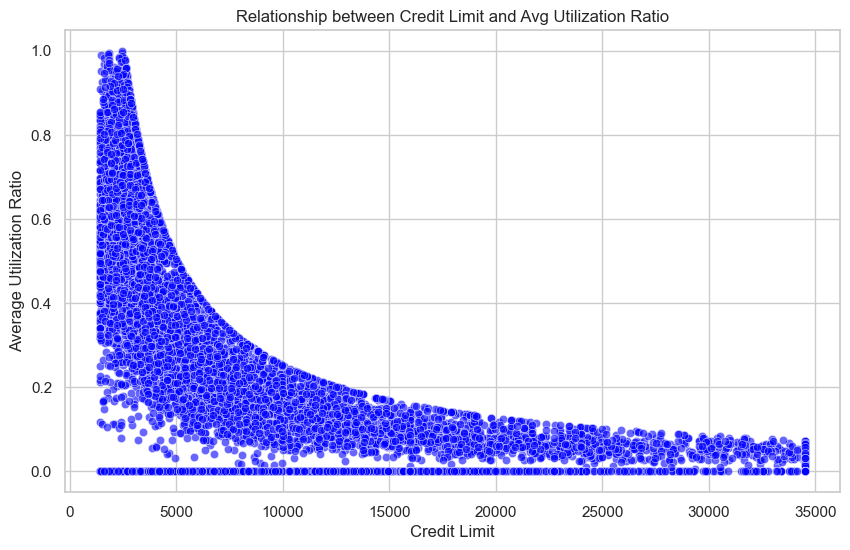

Correlation between Credit_Limit and Avg_Utilization_Ratio: -0.48


In [9]:
# Scatter plot to analyze the relationship between Credit_Limit and Avg_Utilization_Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credit_Limit', y='Avg_Utilization_Ratio', data=df, alpha=0.6, color="blue")
plt.title("Relationship between Credit Limit and Avg Utilization Ratio")
plt.xlabel("Credit Limit")
plt.ylabel("Average Utilization Ratio")
plt.show()

# Calculate the correlation
correlation = df['Credit_Limit'].corr(df['Avg_Utilization_Ratio'])
print(f"Correlation between Credit_Limit and Avg_Utilization_Ratio: {correlation:.2f}")


Negative correlation:

As Credit_Limit increases, Avg_Utilization_Ratio decreases.
This means that customers with a higher credit limit tend to use a lower percentage of their available credit.

High Avg_Utilization_Ratio values:
They are mainly observed in customers with a low credit limit (less than 5000).
This indicates a high credit limit burden among customers with little available credit.

Low Avg_Utilization_Ratio values:
Prefer customers with a high credit limit (over 10,000).
This indicates that such customers use credit more carefully or have less need to use it.

## Credit_Limit_Segment – визначає сегмент для Credit_Limit:

Low (0 - 5000)
Medium (5000 - 15000)
High (15000+)
Utilization_Segment – визначає сегмент для Avg_Utilization_Ratio:

Low (0 - 0.2)
Medium (0.2 - 0.6)
High (0.6 - 1.0)

In [10]:
# Segment 'Credit_Limit' into bins (Low, Medium, High)
credit_bins = [0, 5000, 15000, df['Credit_Limit'].max()]  # Define bin edges
credit_labels = ['Low', 'Medium', 'High']  # Define labels
df['Credit_Limit_Segment'] = pd.cut(df['Credit_Limit'], bins=credit_bins, labels=credit_labels)

# Segment 'Avg_Utilization_Ratio' into bins (Low, Medium, High)
util_bins = [0, 0.2, 0.6, 1.0]  # Define bin edges
util_labels = ['Low', 'Medium', 'High']  # Define labels
df['Utilization_Segment'] = pd.cut(
    df['Avg_Utilization_Ratio'], 
    bins=util_bins, 
    labels=util_labels, 
    include_lowest=True,  # Include the lowest value in the first bin
    right=True  # Include the right edge in the bin
)

# Display updated data to confirm
print("Updated data with segmentation:")
print(df[['Credit_Limit', 'Credit_Limit_Segment', 'Avg_Utilization_Ratio', 'Utilization_Segment']].head())


Updated data with segmentation:
   Credit_Limit Credit_Limit_Segment  Avg_Utilization_Ratio  \
0       12691.0               Medium                  0.061   
1        8256.0               Medium                  0.105   
2        3418.0                  Low                  0.000   
3        3313.0                  Low                  0.760   
4        4716.0                  Low                  0.000   

  Utilization_Segment  
0                 Low  
1                 Low  
2                 Low  
3                High  
4                 Low  


In [11]:
# Group by Credit_Limit_Segment and Utilization_Segment
segment_counts = df.groupby(['Credit_Limit_Segment', 'Utilization_Segment']).size().reset_index(name='Count')

# Display the counts
print("Customer segmentation based on Credit Limit and Utilization Ratio:")
print(segment_counts)

# Correct pivot table syntax
pivot_table = segment_counts.pivot(index='Credit_Limit_Segment', columns='Utilization_Segment', values='Count')

# Display the pivot table
print("\nPivot Table:")
print(pivot_table)



Customer segmentation based on Credit Limit and Utilization Ratio:
  Credit_Limit_Segment Utilization_Segment  Count
0                  Low                 Low   1511
1                  Low              Medium   2046
2                  Low                High   1802
3               Medium                 Low   2022
4               Medium              Medium    933
5               Medium                High      0
6                 High                 Low   1813
7                 High              Medium      0
8                 High                High      0

Pivot Table:
Utilization_Segment    Low  Medium  High
Credit_Limit_Segment                    
Low                   1511    2046  1802
Medium                2022     933     0
High                  1813       0     0


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_8548\3946546326.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts = df.groupby(['Credit_Limit_Segment', 'Utilization_Segment']).size().reset_index(name='Count')


Low Credit Limit customers are more likely to use a high credit limit.

Medium and High Credit Limit groups have a stable financial behavior with a low utilization ratio.

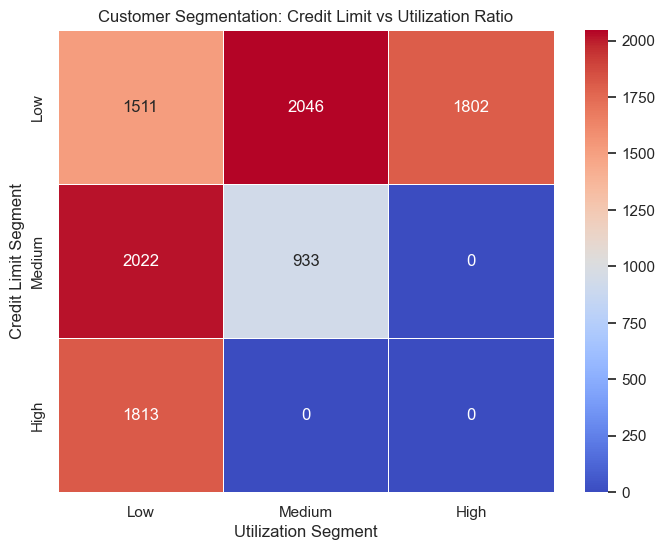

In [12]:
# Visualize the segmentation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)
plt.title("Customer Segmentation: Credit Limit vs Utilization Ratio")
plt.xlabel("Utilization Segment")
plt.ylabel("Credit Limit Segment")
plt.show()


Low Utilization Клієнти з низьким кредитним лімітом мають високий ризик відтоку, особливо група з High Utilization.

Medium Credit Limit: Клієнти з середнім лімітом майже не використовують весь доступний кредит, що говорить про менший ризик.

High Credit Limit Клієнти з високим лімітом мають найнижчий коефіцієнт використання, що свідчить про фінансову стабільність.

Additional analysis of risk groups

In [13]:
# Filter the risky group: Low Credit Limit + High Utilization Ratio
risky_group = df[(df['Credit_Limit_Segment'] == 'Low') & (df['Utilization_Segment'] == 'High')]

# Check the size of the group
print(f"Number of customers in the risky group: {risky_group.shape[0]}")

# Display the first 5 rows of the risky group
print("\nFirst 5 rows of the risky group:")
print(risky_group[['Customer_Age', 'Total_Trans_Ct']].head())


Number of customers in the risky group: 1802

First 5 rows of the risky group:
    Customer_Age  Total_Trans_Ct
3             40              20
18            61              30
23            47              23
30            53              25
31            53              26


Age distribution in the risk group

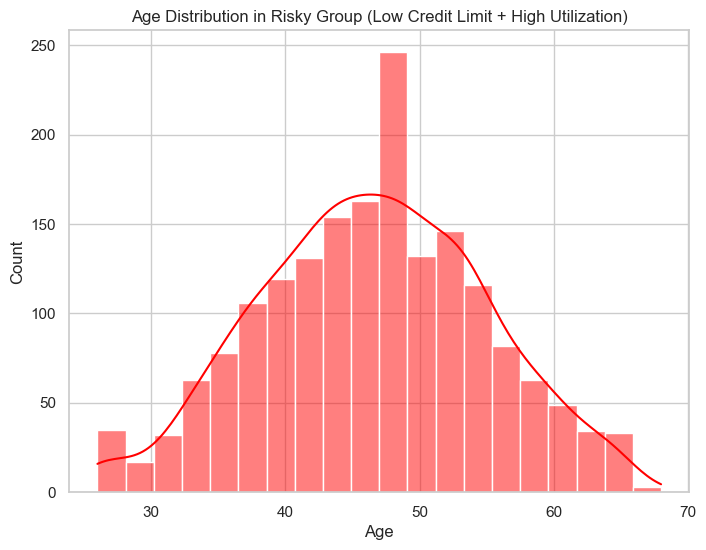

In [14]:
# Plot the age distribution for the risky group
plt.figure(figsize=(8, 6))
sns.histplot(risky_group['Customer_Age'], bins=20, kde=True, color='red')
plt.title("Age Distribution in Risky Group (Low Credit Limit + High Utilization)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Main observations:

Most of the clients in the risk group are in the age range of 35–55 years.

The largest peak (mode) is observed at the level of approximately 50 years.

Younger clients (up to 30 years old) and older ones (over 60 years old) are less common.

So 

Customers in the age group of 35-55 years are the main group with Low Credit Limit and High Utilization Ratio.
This can indicate financial stress in middle age, when expenses increase significantly.

Distribution of the number of transactions (Total_Trans_Ct)

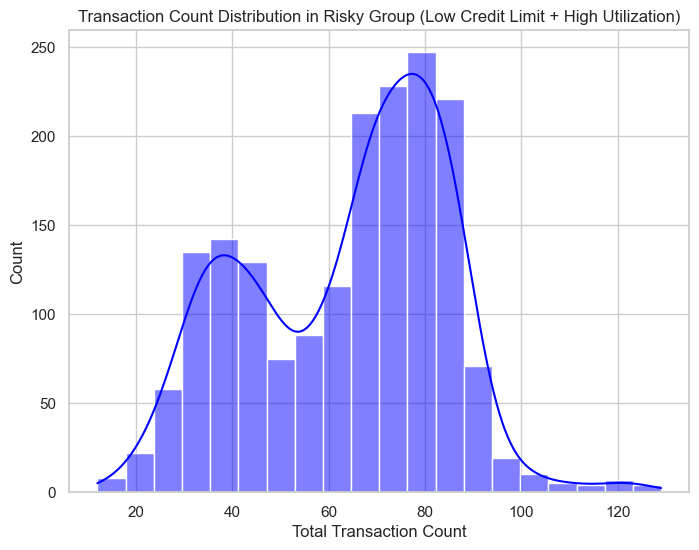

In [15]:
# Plot the transaction count distribution for the risky group
plt.figure(figsize=(8, 6))
sns.histplot(risky_group['Total_Trans_Ct'], bins=20, kde=True, color='blue')
plt.title("Transaction Count Distribution in Risky Group (Low Credit Limit + High Utilization)")
plt.xlabel("Total Transaction Count")
plt.ylabel("Count")
plt.show()


Conclusions

Age:
The majority of customers are aged 35–55, with a peak in their 50s.

Number of transactions:
The distribution of transactions is bimodal, with a peak at 80 transactions.
This indicates a high financial activity among a significant part of clients.

NEXT STEP

To investigate Total_Trans_Amt (загальна сума транзакцій) пов'язана з високим використанням кредитного ліміту у ризикованій групі (Low Credit Limit + High Utilization Ratio).

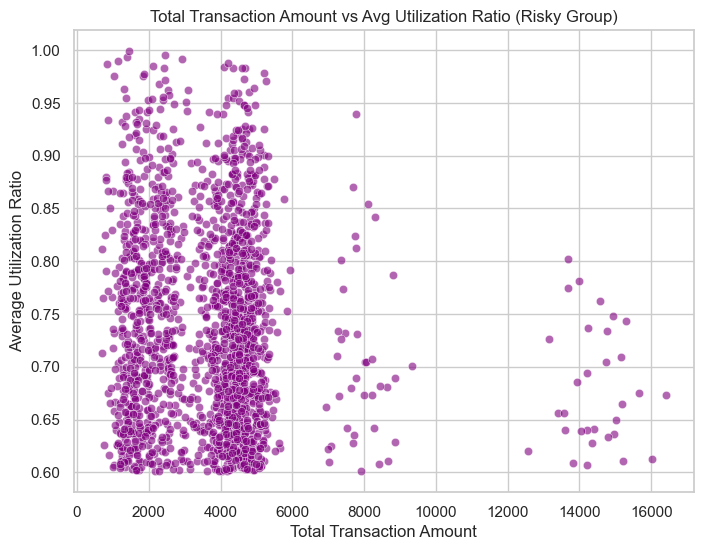

In [16]:
# Scatter plot to analyze the relationship between Total_Trans_Amt and Avg_Utilization_Ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Total_Trans_Amt', 
    y='Avg_Utilization_Ratio', 
    data=risky_group, 
    color='purple', 
    alpha=0.6
)
plt.title("Total Transaction Amount vs Avg Utilization Ratio (Risky Group)")
plt.xlabel("Total Transaction Amount")
plt.ylabel("Average Utilization Ratio")
plt.show()


In [17]:
# Calculate correlation between Total_Trans_Amt and Avg_Utilization_Ratio
correlation = risky_group['Total_Trans_Amt'].corr(risky_group['Avg_Utilization_Ratio'])
print(f"Correlation between Total_Trans_Amt and Avg_Utilization_Ratio: {correlation:.2f}")


Correlation between Total_Trans_Amt and Avg_Utilization_Ratio: -0.11


URSONC

Correlation between Total_Trans_Ct and Total_Trans_Amt: 0.80


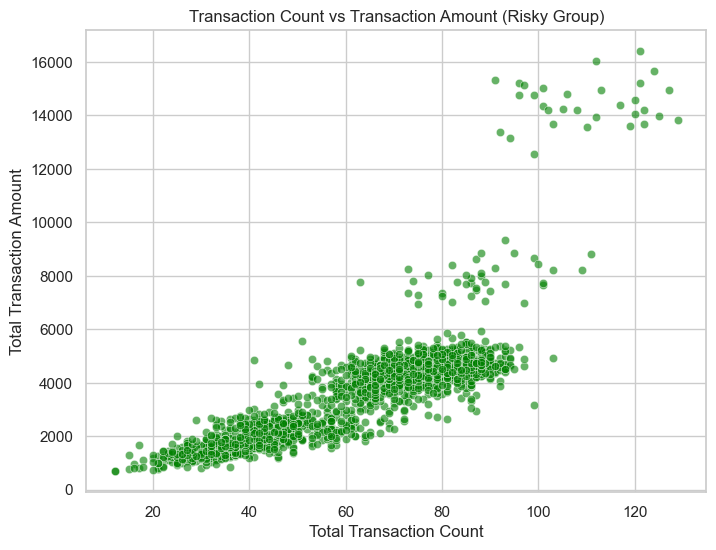

In [52]:
# Calculate correlation between Total_Trans_Ct and Total_Trans_Amt
correlation_ct_amt = risky_group['Total_Trans_Ct'].corr(risky_group['Total_Trans_Amt'])
print(f"Correlation between Total_Trans_Ct and Total_Trans_Amt: {correlation_ct_amt:.2f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Total_Trans_Ct', 
    y='Total_Trans_Amt', 
    data=risky_group, 
    color='green', 
    alpha=0.6
)
plt.title("Transaction Count vs Transaction Amount (Risky Group)")
plt.xlabel("Total Transaction Count")
plt.ylabel("Total Transaction Amount")
plt.show()


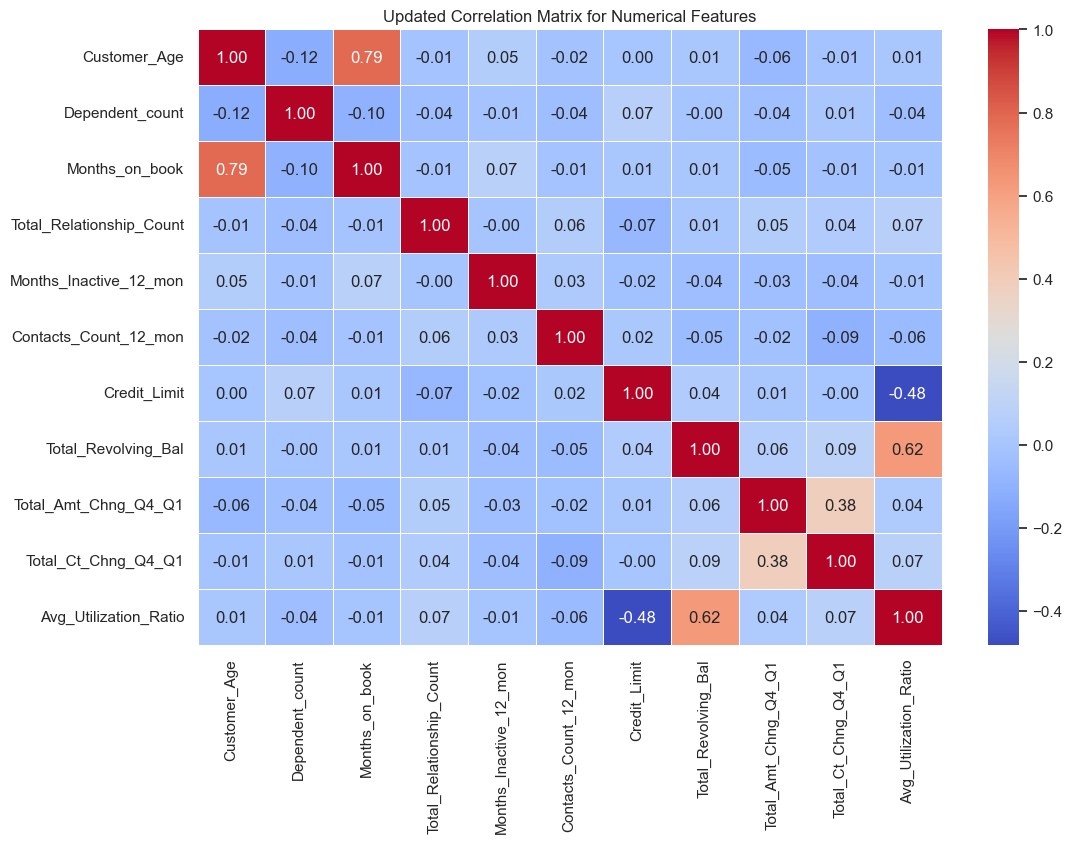

In [53]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix for Numerical Features")
plt.show()



 Petra

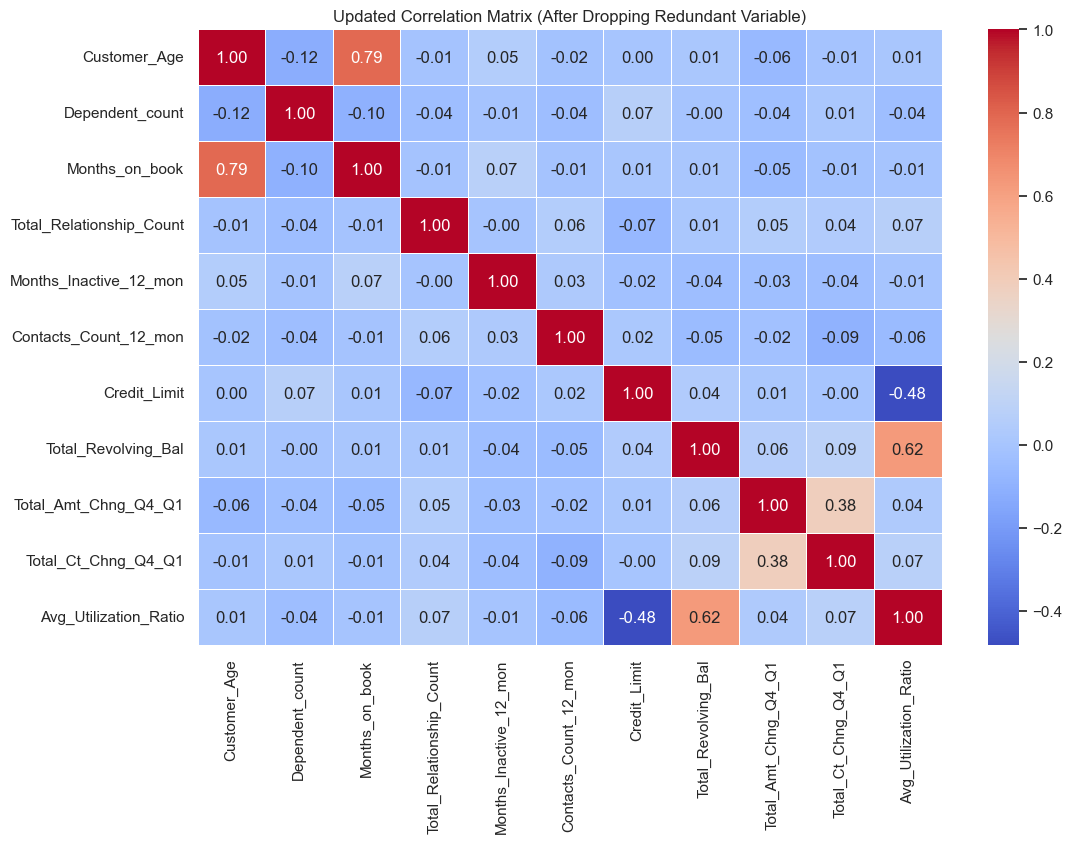

In [55]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Recalculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the updated heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix (After Dropping Redundant Variable)")
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Target variable and features
X = df.drop(columns=['Attrition_Flag'])  # Drop target and redundant ID column
y = df['Attrition_Flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: one-hot encoding for categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=[float, int]).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numerical_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
])

# Fit and transform the data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


Random Forest

Accuracy: 0.9057255676209279

Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.82      0.53      0.65       327
Existing Customer       0.92      0.98      0.95      1699

         accuracy                           0.91      2026
        macro avg       0.87      0.75      0.80      2026
     weighted avg       0.90      0.91      0.90      2026



C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_8548\1445141312.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette="viridis")


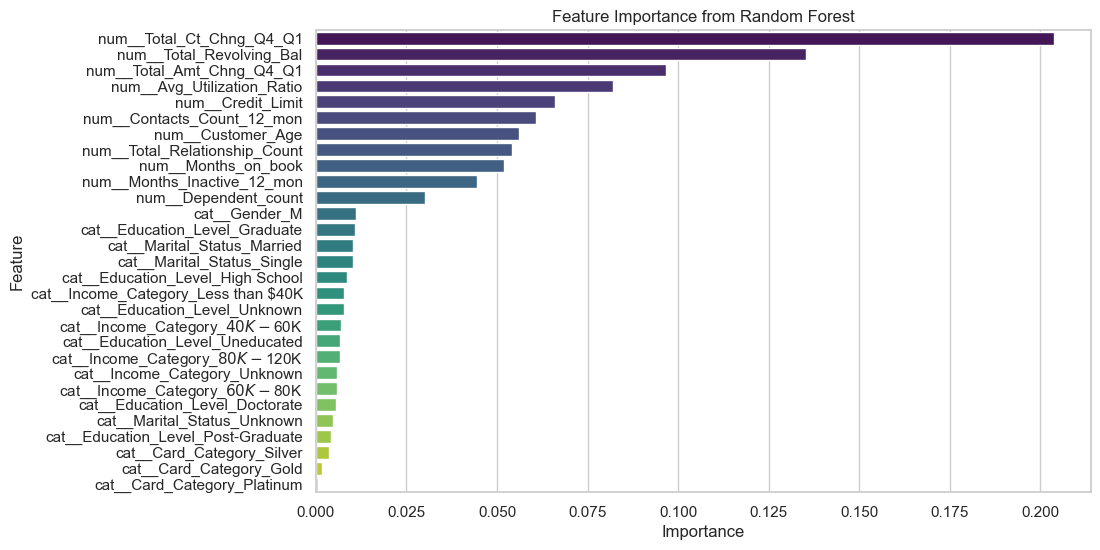

In [59]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Predictions
y_pred = rf_model.predict(X_test_encoded)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Class balance (class_weight='balanced': автоматичне обчислення ваг класів.)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train the model with class_weight='balanced'
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_balanced.fit(X_train_encoded, y_train)

# Step 2: Make predictions
y_pred_balanced = rf_model_balanced.predict(X_test_encoded)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_balanced)
print(f"Accuracy with Balanced Classes: {accuracy:.4f}")

print("\nClassification Report with Balanced Classes:")
print(classification_report(y_test, y_pred_balanced))


Accuracy with Balanced Classes: 0.8959

Classification Report with Balanced Classes:
                   precision    recall  f1-score   support

Attrited Customer       0.82      0.45      0.58       327
Existing Customer       0.90      0.98      0.94      1699

         accuracy                           0.90      2026
        macro avg       0.86      0.72      0.76      2026
     weighted avg       0.89      0.90      0.88      2026



 SMOTE for Oversampling

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

# Step 2: Train a Random Forest model on resampled data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)

# Step 3: Make predictions
y_pred_smote = rf_model_smote.predict(X_test_encoded)

# Step 4: Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy with SMOTE: {accuracy_smote:.4f}")

print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))


Accuracy with SMOTE: 0.8959

Classification Report with SMOTE:
                   precision    recall  f1-score   support

Attrited Customer       0.76      0.52      0.62       327
Existing Customer       0.91      0.97      0.94      1699

         accuracy                           0.90      2026
        macro avg       0.84      0.74      0.78      2026
     weighted avg       0.89      0.90      0.89      2026



XGBoost

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Separation on train/test
X = df.drop(columns=['Attrition_Flag']) # Your target variable
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Building a ColumnTransformer for encoding
preprocessor = ColumnTransformer(transformers=[
 ('num', 'passthrough', numerical_cols), # Leave the numerical columns unchanged
 ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols) # Encoding categories
])

# Coding X_train and X_test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Data preprocessing complete!")

Data preprocessing complete!


In [63]:
import xgboost as xgb
print(f"XGBoost version: {xgb.__version__}")


XGBoost version: 1.6.2


In [64]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Code the target variable y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Step 1: Encoding the target variable (y_train and y_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Initialization of the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 3: Configure grid parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Step 4: Running GridSearchCV to optimize the model
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1
)

# Step 5: Training the model
grid_search.fit(X_train_encoded, y_train_encoded)

# Step 6: Best parameters and evaluation on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_encoded)

# Step 7: Convert predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("\nAccuracy on Test Data:", accuracy_score(y_test_labels, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Accuracy on Test Data: 0.912142152023692

Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.84      0.56      0.67       327
Existing Customer       0.92      0.98      0.95      1699

         accuracy                           0.91      2026
        macro avg       0.88      0.77      0.81      2026
     weighted avg       0.91      0.91      0.90      2026



## Data Preparation for Clustering

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

# Create a copy of the dataset for clustering
df_cluster = df.copy()

# Remove unnecessary columns
df_cluster = df_cluster.drop(columns=['CLIENTNUM', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
         errors='ignore')

# Separate numerical and categorical columns
numerical_cols = df_cluster.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns

# Create a transformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),  # Normalize numeric data
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # Encode categorical data
    ]
)

# Apply transformations
df_cluster_scaled = preprocessor.fit_transform(df_cluster)

# Convert the result to a DataFrame
encoded_feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=encoded_feature_names)

print("Data has been scaled and categorical features encoded successfully!")


Data has been scaled and categorical features encoded successfully!


## Using the "Elbow Method" to determine the optimal number of clusters.


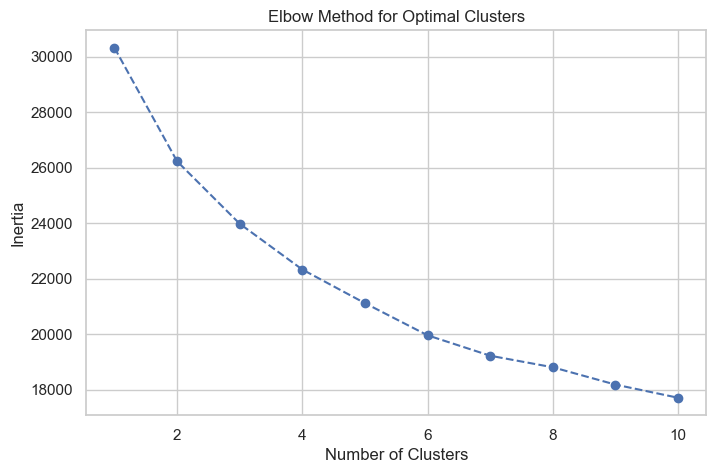

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):  # Test cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


## Clastering

In [74]:
# Optimal number of clusters (you can adjust this based on your observations)
optimal_k = 4  # Set the number of clusters

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

print("Clustering completed!")
print(df_cluster['Cluster'].value_counts())  # Show the number of samples in each cluster


Clustering completed!
Cluster
3    3050
0    2566
2    2390
1    2121
Name: count, dtype: int64


## Analysis of cluster characteristics

Cluster Characteristics:
         Customer_Age  Dependent_count  Months_on_book  \
Cluster                                                  
0           46.956742         2.312159       36.429462   
1           46.466761         2.431872       35.953324   
2           45.970293         2.364854       35.795397   
3           45.976066         2.300656       35.593770   

         Total_Relationship_Count  Months_Inactive_12_mon  \
Cluster                                                     
0                        3.837880                2.341387   
1                        3.844884                2.323904   
2                        3.776987                2.319247   
3                        3.796721                2.370164   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                             
0                     2.402182   4612.241154          1149.908807   
1                     2.523810  12267.941301        

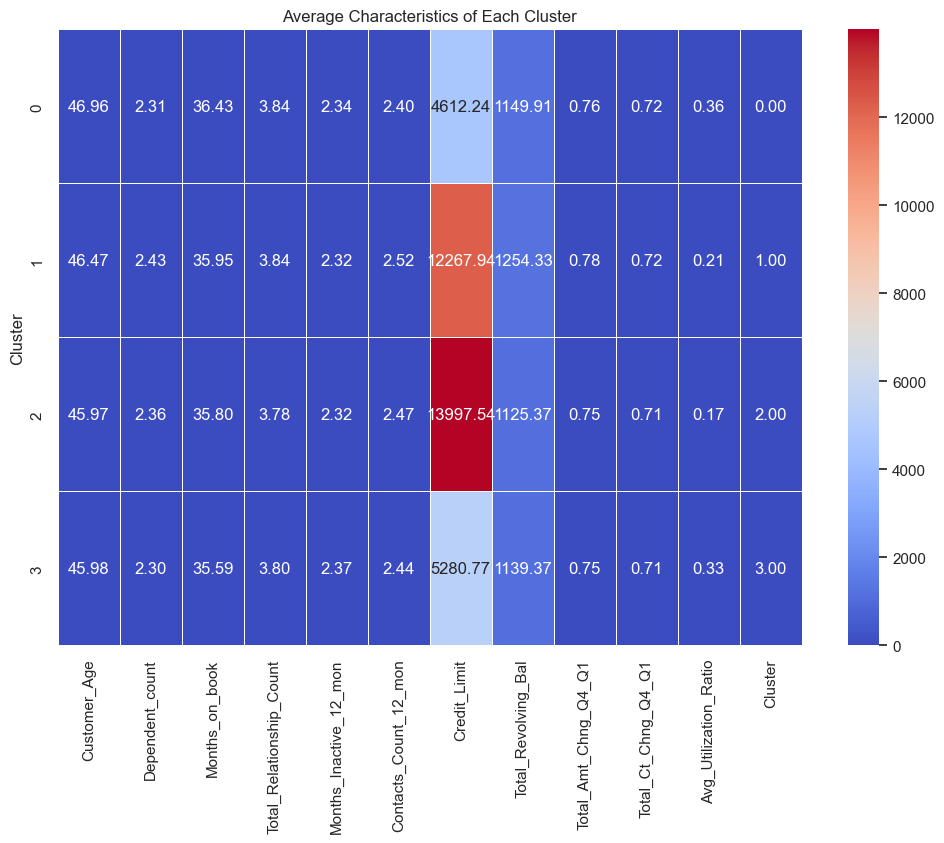

In [76]:
# Select only numeric columns for aggregation
numeric_columns = df_cluster.select_dtypes(include=[np.number]).columns

# Calculate average characteristics for numeric columns
cluster_summary = df_cluster.groupby('Cluster')[numeric_columns].mean()

# Display the summary
print("Cluster Characteristics:")
print(cluster_summary)

# Visualize the results using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Average Characteristics of Each Cluster")
plt.show()



In [80]:
# Add 'Age' column for age categories
df_cluster['Age'] = 0  # Initialize column with default value 0

# Categorize 'Customer_Age' into groups
df_cluster.loc[df_cluster['Customer_Age'] <= 25, 'Age'] = 0
df_cluster.loc[(df_cluster['Customer_Age'] > 25) & (df_cluster['Customer_Age'] <= 35), 'Age'] = 1
df_cluster.loc[(df_cluster['Customer_Age'] > 35) & (df_cluster['Customer_Age'] <= 45), 'Age'] = 2
df_cluster.loc[(df_cluster['Customer_Age'] > 45) & (df_cluster['Customer_Age'] <= 55), 'Age'] = 3
df_cluster.loc[(df_cluster['Customer_Age'] > 55) & (df_cluster['Customer_Age'] <= 65), 'Age'] = 4
df_cluster.loc[df_cluster['Customer_Age'] > 65, 'Age'] = 5

# Convert 'Age' column to integer type
df_cluster['Age'] = df_cluster['Age'].astype(int)

print("Age categories have been updated and added!")



Age categories have been updated and added!


In [81]:
# Group by Cluster and Age category
age_distribution = df_cluster.groupby(['Cluster', 'Age']).size().reset_index(name='Count')

# Display the distribution
print(age_distribution)


    Cluster  Age  Count
0         0    1    202
1         0    2    907
2         0    3   1080
3         0    4    371
4         0    5      6
5         1    1    171
6         1    2    770
7         1    3    925
8         1    4    251
9         1    5      4
10        2    1    208
11        2    2    930
12        2    3    967
13        2    4    285
14        3    1    338
15        3    2   1135
16        3    3   1163
17        3    4    414


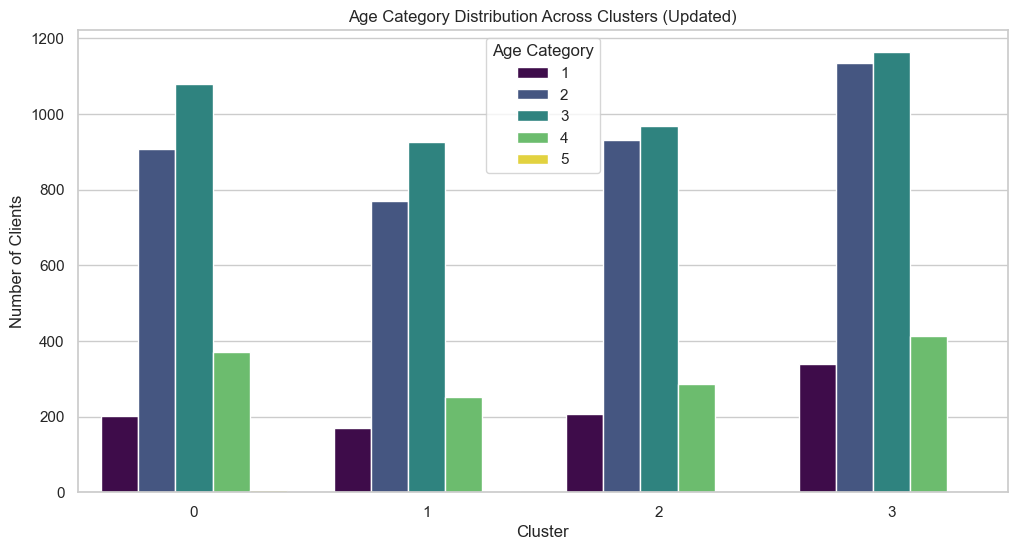

In [83]:
# Group by Cluster and Age category
age_distribution = df_cluster.groupby(['Cluster', 'Age']).size().reset_index(name='Count')

# Plot distribution of Age categories per cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=age_distribution, x='Cluster', y='Count', hue='Age', palette='viridis')
plt.title('Age Category Distribution Across Clusters (Updated)')
plt.xlabel('Cluster')
plt.ylabel('Number of Clients')
plt.legend(title='Age Category')
plt.show()



C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_8548\4012040644.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(


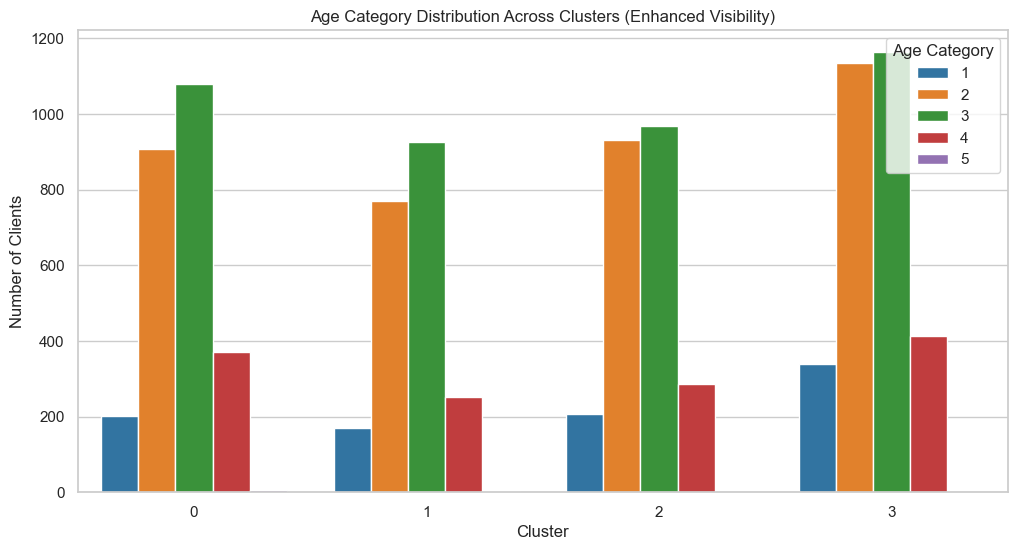

In [85]:
# New color palette to make all categories visible
palette = sns.color_palette("tab10", n_colors=6)  # Adjust to more distinct colors

plt.figure(figsize=(12, 6))
sns.countplot(
    x='Cluster',
    hue='Age',
    data=df_cluster,
    palette=palette
)
plt.title("Age Category Distribution Across Clusters (Enhanced Visibility)")
plt.xlabel("Cluster")
plt.ylabel("Number of Clients")
plt.legend(title="Age Category", loc="upper right")
plt.show()


In [88]:
# Count the number of clients in age category "0" (up to 25 years) per cluster
age_under_25_counts = df_cluster[df_cluster['Age'] == 0].groupby('Cluster')['Age'].count()

print("Number of clients in Age Category '0' (under 25 years) for each cluster:")
print(age_under_25_counts)


Number of clients in Age Category '0' (under 25 years) for each cluster:
Series([], Name: Age, dtype: int64)


In [90]:
# Remove the unused category (0) for Age
df_cluster = df_cluster[df_cluster['Age'] != 0]
print("Removed clients under 25 years from the dataset.")


Removed clients under 25 years from the dataset.


Updated Cluster Characteristics:
         Customer_Age  Dependent_count  Months_on_book  \
Cluster                                                  
0           46.956742         2.312159       36.429462   
1           46.466761         2.431872       35.953324   
2           45.970293         2.364854       35.795397   
3           45.976066         2.300656       35.593770   

         Total_Relationship_Count  Months_Inactive_12_mon  \
Cluster                                                     
0                        3.837880                2.341387   
1                        3.844884                2.323904   
2                        3.776987                2.319247   
3                        3.796721                2.370164   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                             
0                     2.402182   4612.241154          1149.908807   
1                     2.523810  12267.941301

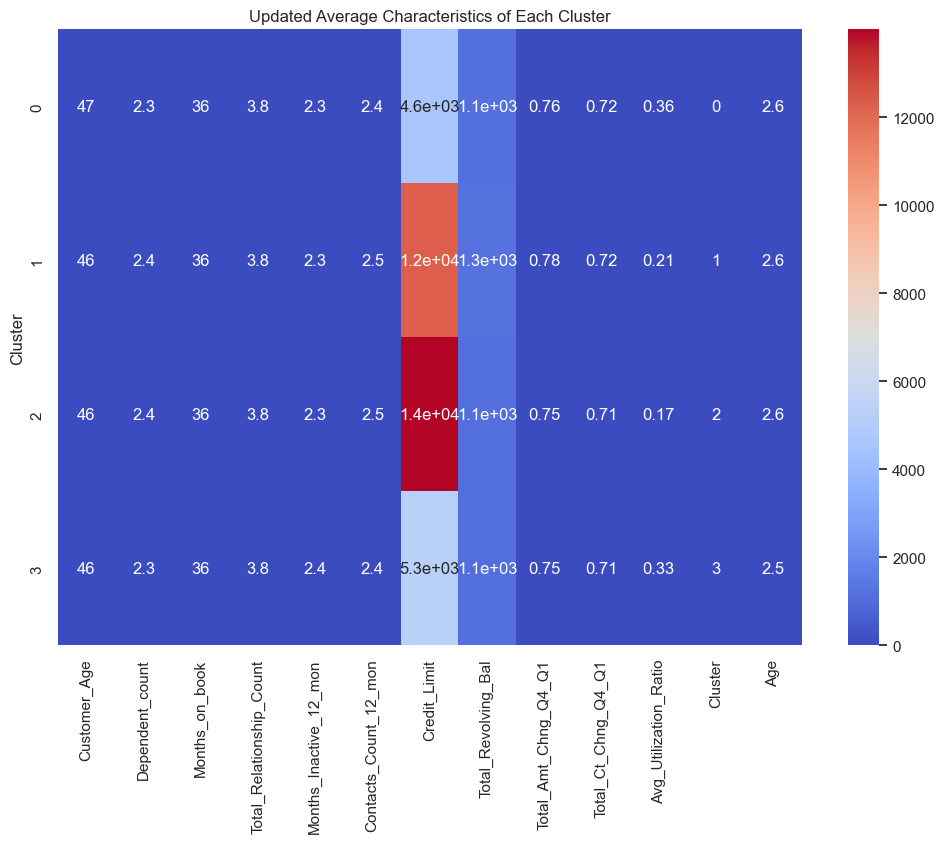

In [93]:
# Select only numeric columns for grouping and aggregation
numeric_columns = df_cluster.select_dtypes(include=['number']).columns

# Calculate average characteristics for each cluster
cluster_summary = df_cluster[numeric_columns].groupby(df_cluster['Cluster']).mean()

# Display updated cluster characteristics
print("Updated Cluster Characteristics:")
print(cluster_summary)

# Visualize updated cluster characteristics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm")
plt.title("Updated Average Characteristics of Each Cluster")
plt.show()





Updated Cluster Characteristics:
         Customer_Age  Dependent_count  Months_on_book  \
Cluster                                                  
0               46.96             2.31           36.43   
1               46.47             2.43           35.95   
2               45.97             2.36           35.80   
3               45.98             2.30           35.59   

         Total_Relationship_Count  Months_Inactive_12_mon  \
Cluster                                                     
0                            3.84                    2.34   
1                            3.84                    2.32   
2                            3.78                    2.32   
3                            3.80                    2.37   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                             
0                         2.40       4612.24              1149.91   
1                         2.52      12267.94

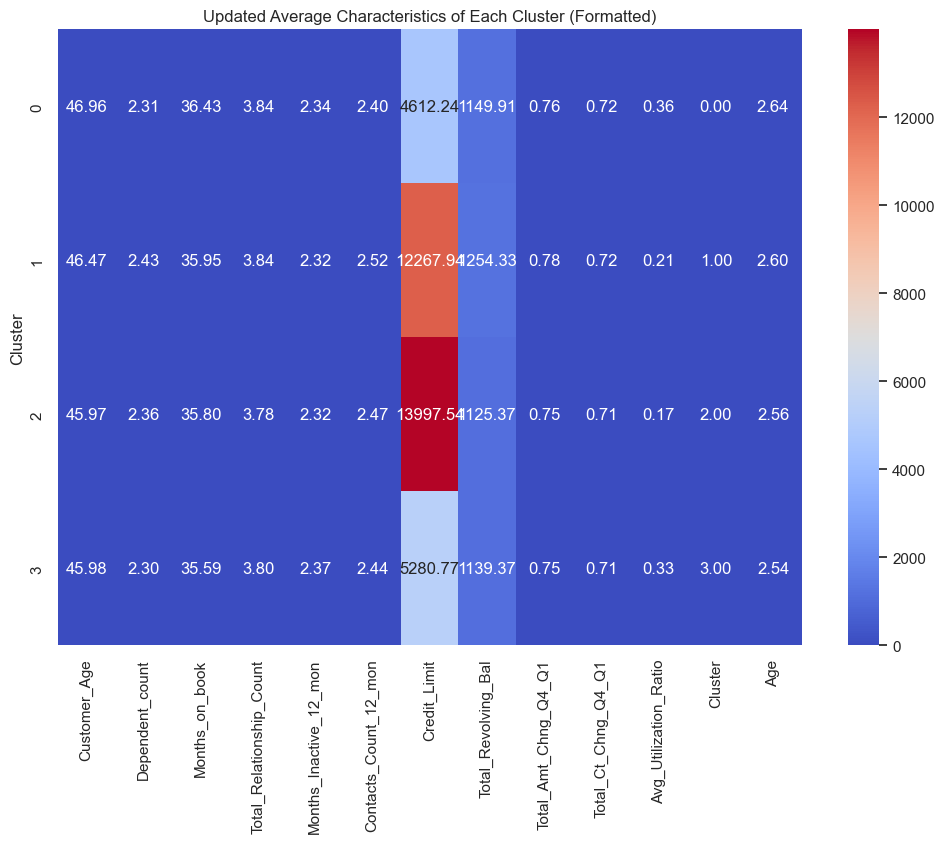

In [94]:
# Set display options for better readability
pd.set_option('display.float_format', '{:.2f}'.format)

# Recalculate cluster summary with properly formatted numbers
cluster_summary = df_cluster[numeric_columns].groupby(df_cluster['Cluster']).mean()

# Display updated cluster characteristics
print("Updated Cluster Characteristics:")
print(cluster_summary)

# Visualize updated cluster characteristics
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap="coolwarm")
plt.title("Updated Average Characteristics of Each Cluster (Formatted)")
plt.show()


In [96]:
from sklearn.cluster import KMeans

# Step 1: Perform KMeans clustering
def perform_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    return cluster_labels

# Step 2: Add age categories
def add_age_categories(data, age_column='Customer_Age'):
    data['Age'] = 0  # Initialize column with default value 0
    # Categorize age into groups
    data.loc[(data[age_column] > 25) & (data[age_column] <= 35), 'Age'] = 0
    data.loc[(data[age_column] > 35) & (data[age_column] <= 45), 'Age'] = 1
    data.loc[(data[age_column] > 45) & (data[age_column] <= 55), 'Age'] = 2
    data.loc[(data[age_column] > 55) & (data[age_column] <= 65), 'Age'] = 3
    data.loc[data[age_column] > 65, 'Age'] = 4
    # Convert 'Age' column to integer type
    data['Age'] = data['Age'].astype(int)
    return data

# Set the number of clusters (you can adjust this based on Elbow Method)
optimal_k = 5

# Perform clustering
df_cluster['Cluster'] = perform_clustering(df_cluster_scaled, optimal_k)

print("Clustering completed!")
print(df_cluster['Cluster'].value_counts())  # Show the number of samples in each cluster

# Add age categories
df_cluster = add_age_categories(df_cluster)

print("Age categories have been updated and added!")


Clustering completed!
Cluster
2    2379
3    2112
4    2075
1    1933
0    1628
Name: count, dtype: int64
Age categories have been updated and added!


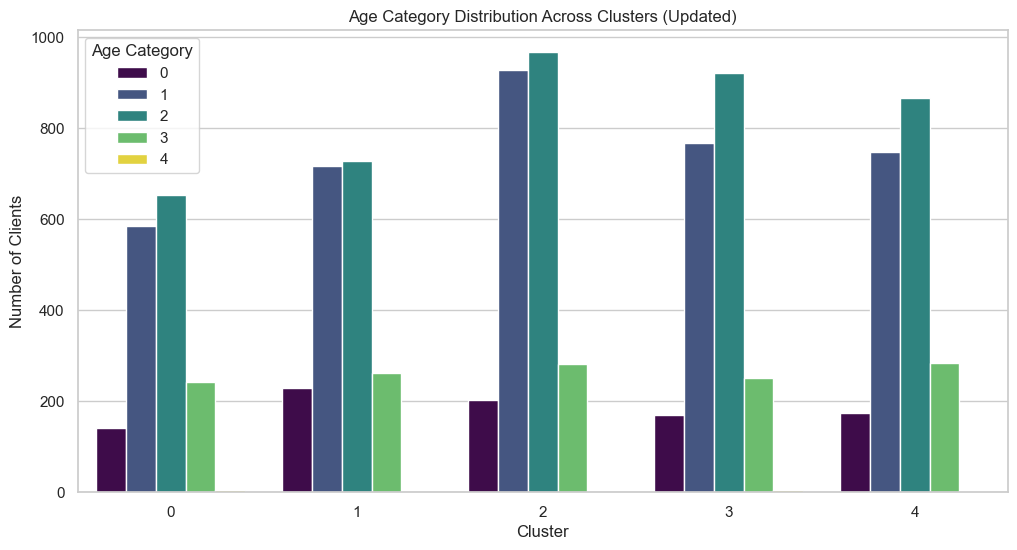

In [97]:
# Group by Cluster and Age category
age_distribution = df_cluster.groupby(['Cluster', 'Age']).size().reset_index(name='Count')

# Plot distribution of Age categories per cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=age_distribution, x='Cluster', y='Count', hue='Age', palette='viridis')
plt.title('Age Category Distribution Across Clusters (Updated)')
plt.xlabel('Cluster')
plt.ylabel('Number of Clients')
plt.legend(title='Age Category')
plt.show()

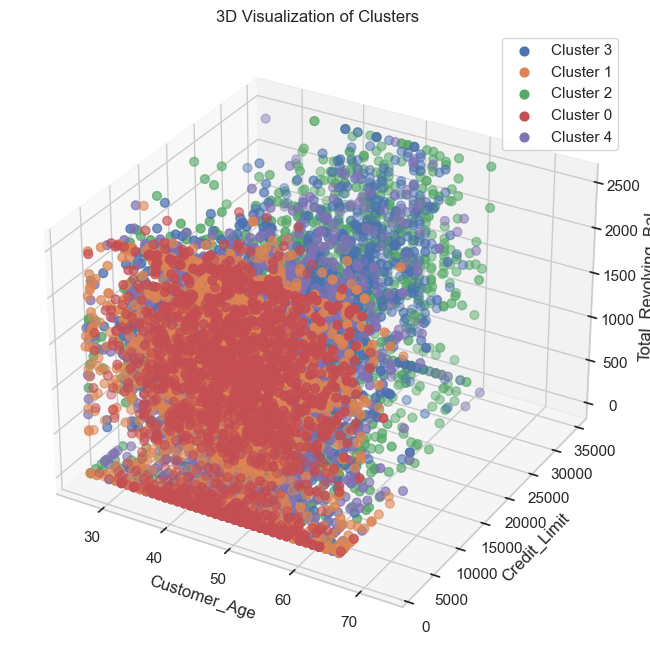

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example of three features for 3D visualization (you can change these)
feature_x = 'Customer_Age'  # X-axis
feature_y = 'Credit_Limit'  # Y-axis
feature_z = 'Total_Revolving_Bal'  # Z-axis

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in df_cluster['Cluster'].unique():
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    ax.scatter(
        cluster_data[feature_x],
        cluster_data[feature_y],
        cluster_data[feature_z],
        label=f'Cluster {cluster}',
        s=40  # Size of points
    )

# Label axes
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)
ax.set_title('3D Visualization of Clusters')
ax.legend()

# Show plot
plt.show()


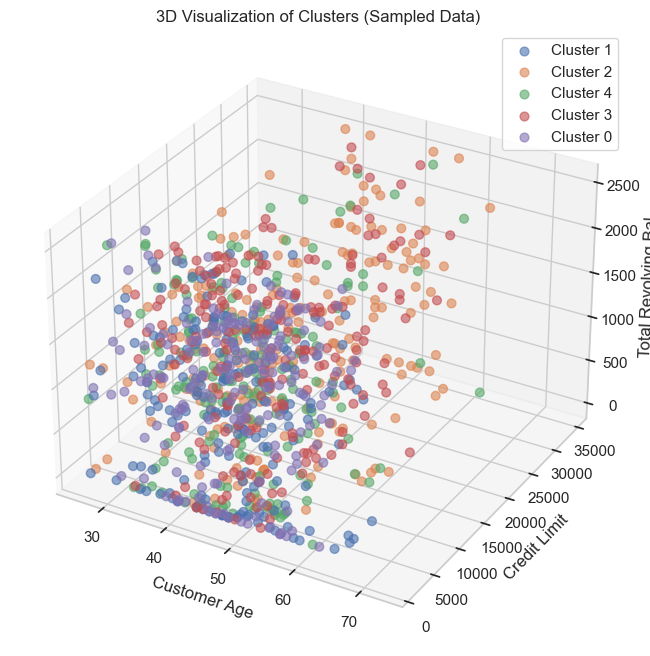

In [99]:
import numpy as np

# Take a random sample of the data for clearer visualization
sampled_data = df_cluster.sample(n=1000, random_state=42)  # Adjust 'n' as needed

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster with transparency
for cluster in sampled_data['Cluster'].unique():
    cluster_data = sampled_data[sampled_data['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Customer_Age'],  # X-axis
        cluster_data['Credit_Limit'],  # Y-axis
        cluster_data['Total_Revolving_Bal'],  # Z-axis
        label=f'Cluster {cluster}',
        alpha=0.6,  # Transparency
        s=40  # Size of points
    )

# Label axes
ax.set_xlabel('Customer Age')
ax.set_ylabel('Credit Limit')
ax.set_zlabel('Total Revolving Bal')
ax.set_title('3D Visualization of Clusters (Sampled Data)')
ax.legend()

# Show plot
plt.show()
